## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [138]:
%pylab inline
import pandas as pd
import scipy.stats as st

Populating the interactive namespace from numpy and matplotlib


In [23]:
df = pd.read_csv('data/human_body_temperature.csv')

In [51]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68
1,98.4,F,81
2,97.8,M,73
3,99.2,F,66
4,98.0,F,73


In [109]:
df.tail()

,temperature,gender,heart_rate
125,96.3,M,70
126,97.7,M,77
127,98.2,F,73
128,97.9,M,72
129,98.7,F,59


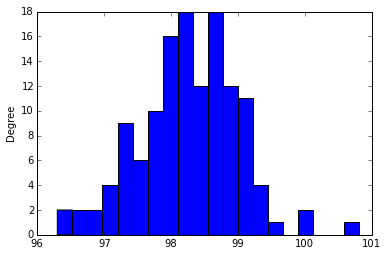

In [40]:
df['temperature'].plot(kind='hist', bins = 20)
#df.hist(layout = (1,2))
#df.columns.values


Looking at the temperature hiostogram above, one sees that it looks fairly normal, with a slight left-skew. Based on what we have seen in the Coursera course, this is alright.

In [183]:
st.normaltest(df['temperature'])
st.shapiro(df['temperature'])

(0.9865770936012268, 0.233174666762352)

In [71]:
df['temperature'].std()
#df['temperature'].var()

0.5375575432319613

In [134]:
SE = (df['temperature'].std()/sqrt(df['temperature'].count()))
print(str(round(df['temperature'].mean(),2)) + u" \u00B1 " + str(round(1.96* SE,2)) + ' F')

98.25 ± 0.13 F


If I choose a confidence interval of 95%, 98.6 is not within that interval. So based on a simple confidence interval analysis, we cannot say that 98.6 F is the true population mean.

In [176]:
SE = (df['temperature'].std()/sqrt(df['temperature'].count()))
Z = round((df['temperature'].mean() - 98.6)/(SE),2)
print('The Z score is: ' + str(Z))
print('The p-value is: ' + str(st.norm.cdf(Z)))

The Z score is: -5.45
The p-value is: 2.51849100545e-08


If we do a Z score analysis, I get a very large number. Indeed, if I calculate the area under the curve using the norm.cdf() function, I get a tiny number, which again confirms that, based on these data, the population mean is not 98.6 F.

t statistics is used for small sample sizes; in this case we have 130 data points which is more than enough! Just for curiosity's sake, here is the calculation for a t-distribution:

In [179]:
SE = (df['temperature'].std()/sqrt(df['temperature'].count()))
Z = round((df['temperature'].mean() - 98.6)/(SE),2)
print('The Z score is: ' + str(Z))
print('The p-value is: ' + str(st.t.cdf(Z,130)))

The Z score is: -5.45
The p-value is: 1.21909829047e-07


In [149]:
print(str(round(df['temperature'].mean(),2)) + u" \u00B1 " + str(round(df['temperature'].std(),2)))
#print(str((df['temperature'].mean()-32)*5/9), '+', ((df['temperature'].std())*5/9))

98.25 ± 0.73


Any tempearture outside the above range should be considered abnormal. Note that I am using the std NOT the SE here, because I am interested in somebody's temperature not the average over a certain sample!

In [155]:
df.groupby('gender')['temperature'].count()

gender
F    65
M    65
Name: temperature, dtype: int64

In [151]:
df.groupby('gender')['temperature'].mean()

gender
F    98.393846
M    98.104615
Name: temperature, dtype: float64

In [152]:
df.groupby('gender')['temperature'].std()

gender
F    0.743488
M    0.698756
Name: temperature, dtype: float64

In [153]:
mu = 98.393846 - 98.104615
mu

0.2892310000000009

In [157]:
SE = sqrt((0.743488*0.743488/65) + (0.698756*0.698756/65))
SE

0.1265539929577035

In [158]:
Z = mu / SE
Z

2.2854355934598352

In [161]:
2 * st.norm.cdf(-Z)

0.022287298943755664

I have done a hypothesis test. The p-value I get is ~2.2%, which means that we can confidently reject the null hypothesis (that there is no difference between male and female body temperatures). In other words, based on our data, we find strong evidence that there is a significant difference between males and females in normal temperature!